In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

In [2]:
df = pd.read_csv('supermarket_sales_clean.csv')

In [3]:
df.sample(10)

,city,time,product_line,unit_price,quantity,tax_5%,total,payment,customer_type,gender,rating,cogs,gross_income
757,naypyitaw,2019-01-30 17:08:00,sports_and_travel,22.38,1,1.1190,23.4990,credit card,normal,female,8.6,22.38,1.1190
326,yangon,2019-11-02 16:06:00,sports_and_travel,94.76,4,18.9520,397.9920,ewallet,normal,female,7.8,379.04,18.9520
161,yangon,2019-03-13 16:40:00,health_and_beauty,15.87,10,7.9350,166.6350,cash,member,male,5.8,158.70,7.9350
753,naypyitaw,2019-01-29 13:46:00,health_and_beauty,40.35,1,2.0175,42.3675,ewallet,normal,male,6.2,40.35,2.0175
554,mandalay,2019-03-26 10:34:00,electronic_accessories,45.71,3,6.8565,143.9865,credit card,normal,female,7.7,137.13,6.8565
44,yangon,2019-01-21 10:00:00,food_and_beverages,36.36,2,3.6360,76.3560,cash,member,female,7.1,72.72,3.6360
315,yangon,2019-10-03 18:55:00,sports_and_travel,25.84,3,3.8760,81.3960,ewallet,normal,male,6.6,77.52,3.8760
595,mandalay,2019-06-02 14:51:00,health_and_beauty,25.90,10,12.9500,271.9500,ewallet,member,male,8.7,259.00,12.9500
257,yangon,2019-05-02 11:51:00,sports_and_travel,75.20,3,11.2800,236.8800,ewallet,member,female,4.8,225.60,11.2800
453,mandalay,2019-02-16 18:04:00,fashion_accessories,60.18,4,12.0360,252.7560,credit card,member,male,9.4,240.72,12.0360


In [4]:
df.dtypes

city              object
time              object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
total            float64
payment           object
customer_type     object
gender            object
rating           float64
cogs             float64
gross_income     float64
dtype: object

In [5]:
df.select_dtypes(include=['object']).columns

Index(['city', 'time', 'product_line', 'payment', 'customer_type', 'gender'], dtype='object')

In [6]:
df.select_dtypes(include=[np.number]).columns

Index(['unit_price', 'quantity', 'tax_5%', 'total', 'rating', 'cogs',
       'gross_income'],
      dtype='object')

In [7]:
df.select_dtypes(include=['object']).columns

Index(['city', 'time', 'product_line', 'payment', 'customer_type', 'gender'], dtype='object')

In [8]:
df.select_dtypes(include=[np.number]).columns

Index(['unit_price', 'quantity', 'tax_5%', 'total', 'rating', 'cogs',
       'gross_income'],
      dtype='object')

Plotting the Data

In [9]:
sns.set_theme(style='darkgrid')

Histogram

<Axes: xlabel='unit_price', ylabel='Count'>

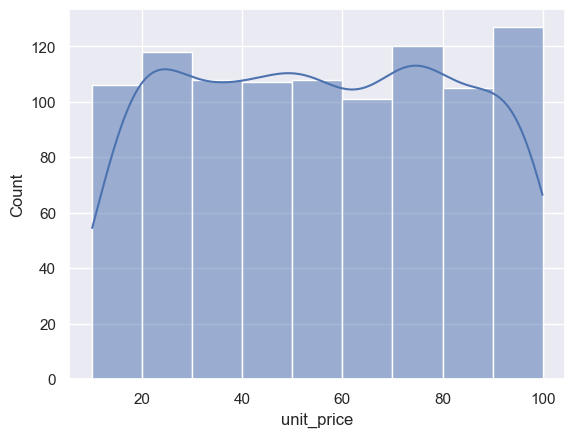

In [10]:
sns.histplot(data=df,x='unit_price',kde=True,binwidth=10,binrange=(10,100),stat='count',discrete=False)

<Axes: xlabel='unit_price', ylabel='Count'>

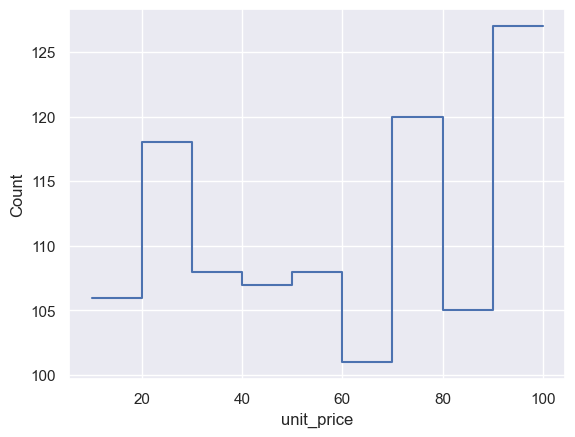

In [11]:
sns.histplot(data=df,x='unit_price',binwidth=10,binrange=(10,100),stat='count',discrete=False,element='step',fill=False)

<Axes: xlabel='unit_price', ylabel='Count'>

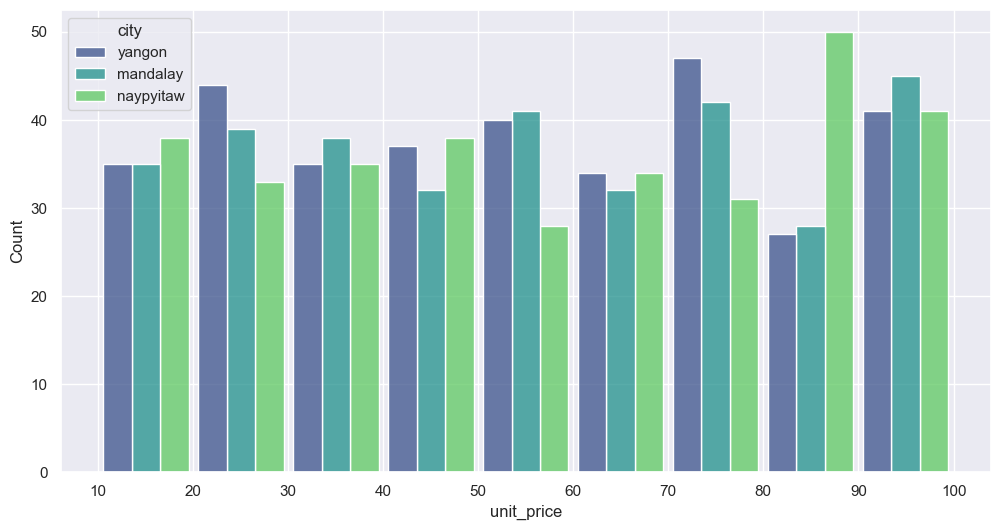

In [12]:
plt.figure(figsize=(12,6))
plt.xticks(range(10,101,10))
sns.histplot(data=df,x='unit_price',binwidth=10,hue='city',multiple='dodge',shrink=0.9,palette='viridis') 



<Axes: xlabel='gross_income', ylabel='rating'>

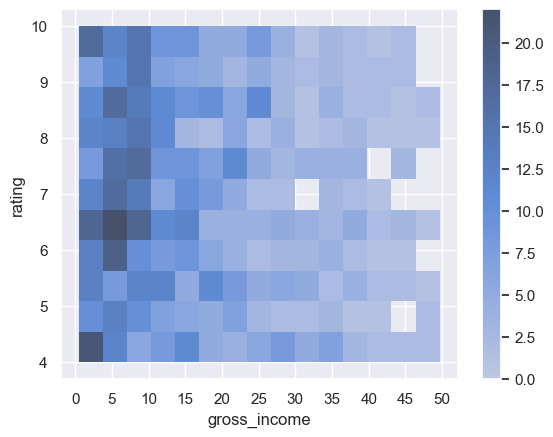

In [13]:
plt.xticks(range(0,101,5))
sns.histplot(data=df,x='gross_income',y='rating',cbar=True,stat='count') 

LinePlot

<Axes: xlabel='product_line', ylabel='gross_income'>

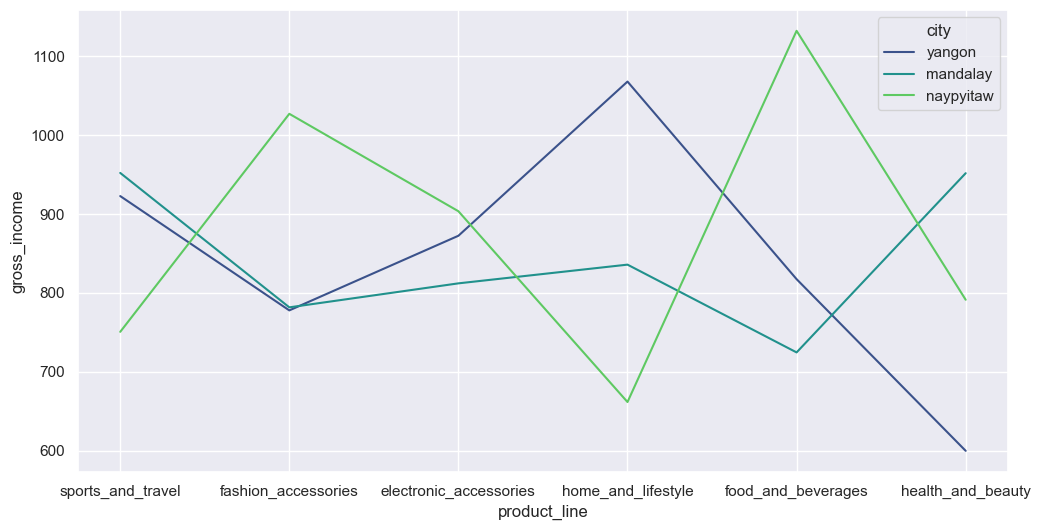

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='product_line',y='gross_income',palette='viridis',hue='city',errorbar=None,estimator='sum')

<Axes: xlabel='product_line', ylabel='quantity'>

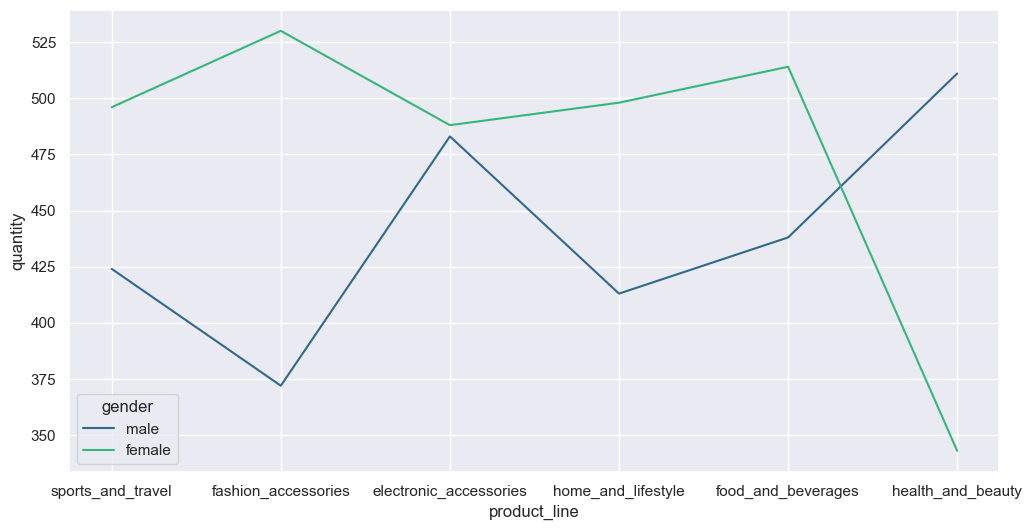

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='product_line',y='quantity',palette='viridis',hue='gender',errorbar=None,estimator='sum')

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['time'].dt.month_name(),y=df['total'],palette='viridis',hue=df['city'],errorbar=None,estimator='sum')

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1200x600 with 0 Axes>

Kernal Density Estimation 

In [ ]:
sns.kdeplot(df['unit_price'],fill=True)

Kernal Density Estimation (bivariate)

In [ ]:
sns.kdeplot(data=df,x='unit_price', y='gross_income',fill=True,cbar=True)